In [1]:
# !/usr/bin/env python3

#cd ~/Desktop/snet/gits/lang-learn-repo/alex_tests

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import sys  
import subprocess
import pywt as pywt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

In [2]:
path = '~/Desktop/snet/gits/lang-learn-repo/alex_tests/data'
filenames = ['bgpclear_first','bgpclear_second','bgpclear_apptraffic_2hourRun','portflap_first']
filename = filenames[0]

mode = pywt.Modes.smooth
level = 9

doc = pd.read_csv(path+"/"+filename+"/all_"+filename+"_raw.csv") 

In [3]:
def get_signal_decomp(data, w, level):
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(level):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)
    
    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    for i, y in enumerate(rec_a):
        out = y

    out = (out-min(out))/(max(out)-min(out))
        
    return out


In [4]:
varnames = doc.columns
#varnames = varnames[:-1]
doc = doc[varnames]

wav = pd.DataFrame(columns=varnames)

for v in varnames:
    item = list(doc[v])
    wav[v] = get_signal_decomp(item, 'db2', level)
    
doc = doc.replace(np.nan,0)
wav = wav.replace(np.nan,0)

/home/alexcasar/miniconda3/envs/ull/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [5]:
display(doc[:5])

,HundredGigE0/0/0/0input-data-rate_leaf1,HundredGigE0/0/0/0input-load_leaf1,HundredGigE0/0/0/0input-packet-rate_leaf1,HundredGigE0/0/0/0output-data-rate_leaf1,HundredGigE0/0/0/0output-load_leaf1,HundredGigE0/0/0/0output-packet-rate_leaf1,HundredGigE0/0/0/1input-data-rate_leaf1,HundredGigE0/0/0/1input-load_leaf1,HundredGigE0/0/0/1input-packet-rate_leaf1,HundredGigE0/0/0/1output-data-rate_leaf1,...,deleted-routes-count_spine4,paths-count_spine4,protocol-route-memory_spine4,routes-counts_spine4,global__established-neighbors-count-total_spine4,performance-statistics__global__configuration-items-processed_spine4,performance-statistics__vrf__inbound-update-messages_spine4,vrf__path-count_spine4,vrf__update-messages-received_spine4,anomaly
0,46827982.0,119.0,4109124.0,58380673.0,148.0,5151673.0,58290630.0,148.0,5102489.0,65147174.0,...,0.0,1180.0,151744.0,153.0,56.0,4.0,121898.0,8407.0,121898.0,0
1,46717186.0,119.0,4103579.0,58297667.0,148.0,5144296.0,58384408.0,148.0,5108546.0,65027227.0,...,0.0,1180.0,151744.0,153.0,56.0,4.0,121898.0,8407.0,121898.0,0
2,47004147.0,119.0,4124310.0,58401648.0,148.0,5154393.0,58489864.0,149.0,5117343.0,64814616.0,...,0.0,1180.0,151744.0,153.0,56.0,4.0,121898.0,8407.0,121898.0,0
3,47084687.0,120.0,4130526.0,58325258.0,148.0,5148481.0,58333650.0,148.0,5104880.0,65013878.0,...,0.0,1180.0,151744.0,153.0,56.0,4.0,121898.0,8407.0,121898.0,0
4,47112097.0,120.0,4133089.0,58527322.0,149.0,5164961.0,58464542.0,149.0,5115252.0,65149673.0,...,0.0,1180.0,151744.0,153.0,56.0,4.0,121898.0,8407.0,121898.0,0


In [6]:
display(wav[:5])

,HundredGigE0/0/0/0input-data-rate_leaf1,HundredGigE0/0/0/0input-load_leaf1,HundredGigE0/0/0/0input-packet-rate_leaf1,HundredGigE0/0/0/0output-data-rate_leaf1,HundredGigE0/0/0/0output-load_leaf1,HundredGigE0/0/0/0output-packet-rate_leaf1,HundredGigE0/0/0/1input-data-rate_leaf1,HundredGigE0/0/0/1input-load_leaf1,HundredGigE0/0/0/1input-packet-rate_leaf1,HundredGigE0/0/0/1output-data-rate_leaf1,...,deleted-routes-count_spine4,paths-count_spine4,protocol-route-memory_spine4,routes-counts_spine4,global__established-neighbors-count-total_spine4,performance-statistics__global__configuration-items-processed_spine4,performance-statistics__vrf__inbound-update-messages_spine4,vrf__path-count_spine4,vrf__update-messages-received_spine4,anomaly
0,0.065473,0.004679,0.008729,0.008933,0.002005,0.009049,0.715793,0.591893,0.700789,0.270252,...,0.005569,0.788924,0.785535,0.691685,0.588023,0.000279,0.000138,0.528261,0.000138,0.485095
1,0.056696,0.000000,0.000000,0.000000,0.000000,0.000000,0.723507,0.599006,0.708430,0.262469,...,0.000000,0.792083,0.788706,0.695230,0.590361,0.000000,0.000000,0.529404,0.000000,0.484974
2,0.153056,0.071606,0.098975,0.100100,0.035557,0.100741,0.644186,0.529336,0.630278,0.342878,...,0.078622,0.739686,0.736321,0.643147,0.551439,0.026803,0.016232,0.504139,0.016232,0.498524
3,0.221244,0.122771,0.169092,0.170985,0.061049,0.172064,0.588186,0.480239,0.575113,0.399656,...,0.134685,0.702176,0.698822,0.605969,0.523573,0.046350,0.028078,0.485949,0.028078,0.508412
4,0.261261,0.153495,0.210349,0.212654,0.076476,0.213968,0.555507,0.451717,0.542938,0.432803,...,0.168189,0.679551,0.676210,0.583697,0.506762,0.058640,0.035538,0.474836,0.035538,0.514635


In [7]:
maxi = 0
maxs = 0
labs = 0

for i in range(2,12):
    for t in range(3):
        #kmeans = KMeans(n_clusters=i, random_state=0).fit(wav.T)
        kmeans = KMeans(n_clusters=i).fit(wav.T)
        s = metrics.silhouette_score(wav.T, kmeans.labels_, metric='euclidean')
        if s > maxs:
            print(i,s)
            maxi = i
            maxs = s
            labs = kmeans.labels_
        
print(labs)

2 0.5825555442167534
3 0.6033764742222214
4 0.6037648321006782
4 0.6037798099818724
5 0.6360049275206191
6 0.6534492029819615
6 0.6534565933685621
8 0.6557156334471319
8 0.655801748529066
[2 0 2 ... 4 1 0]


In [8]:
normDoc = doc.copy()
normWav = wav.copy()

for v in varnames:
    normDoc[v] = (normDoc[v]-min(normDoc[v]))/(max(normDoc[v])-min(normDoc[v]))
    
clusters = normDoc.T
clusters['cluster']=labs
clustwav = normWav.T
clustwav['cluster']=labs

In [9]:
display(clusters.groupby('cluster').count())

,0,1,2,3,4,5,6,7,8,9,...,652,653,654,655,656,657,658,659,660,661
cluster,,,,,,,,,,,,,,,,,,,,,
0,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
1,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,...,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199
2,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,329,329,329,329,329,329,329,329,329,329,...,329,329,329,329,329,329,329,329,329,329
5,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
6,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
7,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143


In [10]:
def wavPrinter(clusters,clustwav,c):
    test = clusters[clusters['cluster']==c]
    testw = clustwav[clustwav['cluster']==c]
    cols = test.columns
    
    fig = plt.figure(figsize=(20,10))

    for i in range(2,12):
        ax = fig.add_subplot(10, 2, 1 + (i-2) * 2)
        ax.plot(test[cols[int(len(cols)/i)]], 'r')
        ax.set_xlim(0, len(test[cols[int(len(cols)/i)]]) - 1)
        ax.set_ylabel("A%s" % cols[int(len(cols)/i)])
        
        ax = fig.add_subplot(10, 2, 2 + (i-2) * 2)
        ax.plot(testw[cols[int(len(cols)/i)]], 'g')
        ax.set_xlim(0, len(testw[cols[int(len(cols)/i)]]) - 1)
        ax.set_ylabel("D%s" % cols[int(len(cols)/i)]) 

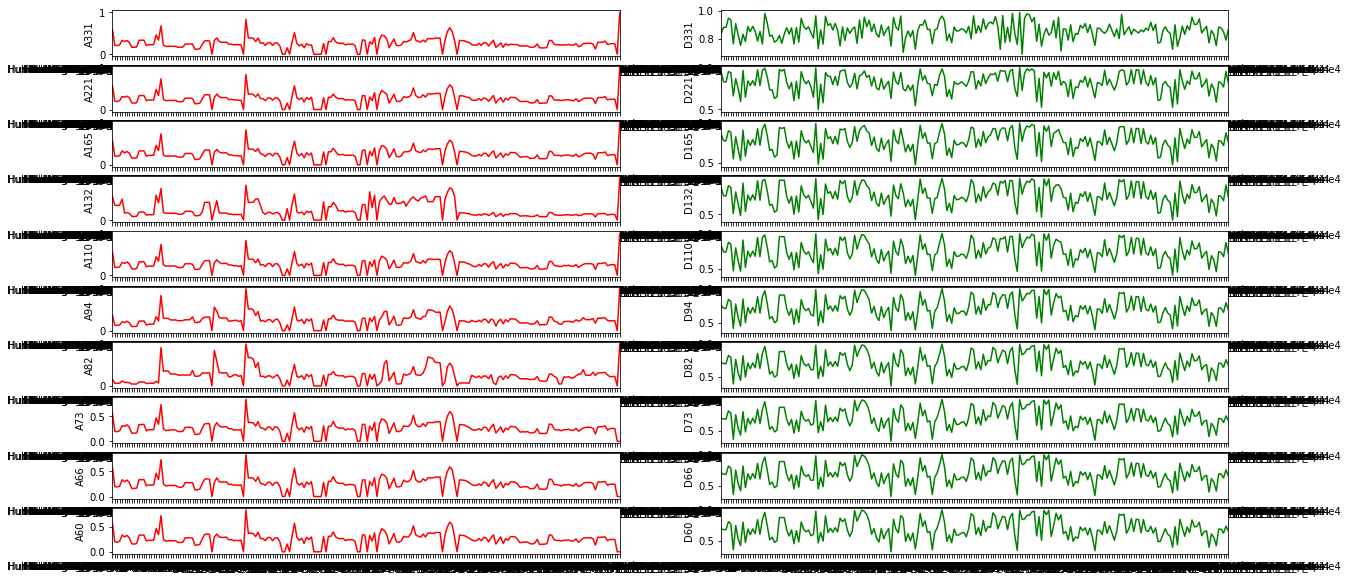

In [11]:
wavPrinter(clusters,clustwav,0)

In [ ]:
wavPrinter(clusters,clustwav,1)

In [ ]:
wavPrinter(clusters,clustwav,2)

In [ ]:
wavPrinter(clusters,clustwav,3)

In [ ]:
wavPrinter(clusters,clustwav,4)

In [ ]:
wavPrinter(clusters,clustwav,5)

In [ ]:
wavPrinter(clusters,clustwav,6)

In [ ]:
wavPrinter(clusters,clustwav,7)

In [ ]:
clId = clustwav.copy()
clId = clId.iloc[:,-2:]
clId.iloc[:,0] = clId.index
clId = clId.reset_index(drop=True)
clId.columns = ['var','cluster']
clId

In [ ]:
#clId.to_csv(path+"/"+filename+"/"+filename+"_clusters.csv",index=False) 